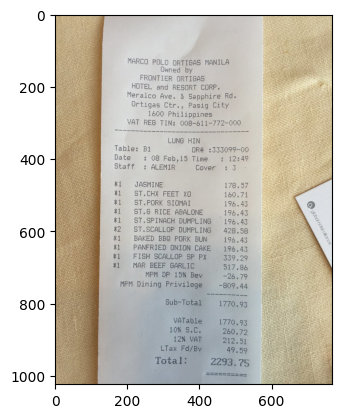

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

input_image = cv.imread('bill.jpg')
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
plt.imshow(input_image, cmap='gray')
plt.show()


In [6]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Dulan Lokugeegana\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'


bill_image = Image.open('bill.jpg')
text = pytesseract.image_to_string(bill_image)
print(text)

MARCO POLO ORTIGAS MANILA

Owned by
FRONTIER ORTIGAS
HOTEL and RESORT CORP.
Meralco Ave. & Sapphire Rd.
Ortigas Ctr., Pasig City
1600 Philippines:

VAT REG TIN: 008-611-772-000
LUNG HIN

Table: Bi OR# :333099-00

Date +: 08 Feb,15 Time +: 12:49

Staff : ALEMIR Cover : 3

10 JASMINE 178.57
41 ST.CHX FEET x0 140,71
x1 ST.PORK SIOMAT 196.43

1 ST.G RICE ABALONE = 196.43
X1  ST.SPINACH DUMPLING 194.43
32 ST.SCALLOP DUNPLING 428.58
x1 BAKED BBQ PORK BUN 194,45
31 PANFRIED ONION CAKE 194.43
41 FISH SCALLOP SP PX 339,29
41 MAR BEEF GARLIC 517.84

MPH DP 15% ~26.79




In [7]:
print(len(text))

565


In [65]:
keys = ['Table', 'OR#', 'Date', 'Time', 'Staff', 'Cover', 'Consumed items', 'Total']

In [66]:
found = [False]*len(keys)
for i in range(len(keys)):
    if keys[i] in text:
        found[i] = True
print(found)

[True, True, True, True, True, True, False, False]


In [67]:
values= []
for i in range(len(keys)):
    
    # finding the length of the value if not found
    backuplen = 2
    if keys[i] == 'Table':
        backuplen = 4
    elif keys[i] == 'OR#':
        backuplen = 11
    elif keys[i] == 'Date':
        backuplen = 9
    elif keys[i] == 'Time':
        backuplen = 5
    elif keys[i] == 'Staff':
        backuplen = 7
    elif keys[i] == 'Cover':
        backuplen = 2
    elif keys[i] == 'Total':
        backuplen = 6

    if i == len(keys)-1:
        values.append(text[text.find(keys[i])+len(keys[i])+2 : backuplen + text.find(keys[i])+len(keys[i])])
    elif keys[i] == 'Date' or keys[i] == 'Time':
        values.append(text[text.find(keys[i])+len(keys[i])+4 : backuplen + text.find(keys[i])+len(keys[i])+4])
    else:
        if found[i] & found[i+1]:
            values.append(text[text.find(keys[i])+len(keys[i])+2 : text.find(keys[i+1])-1])
        elif not found[i]:
            values.append('Not Found')
        elif found[i] & ~found[i+1]:
            values.append(text[text.find(keys[i])+len(keys[i])+3 : backuplen + text.find(keys[i])+len(keys[i])+3])

cleaned_values = [element.strip() for element in values]
print(cleaned_values)


['Bi', '333099-00', '08 Feb,15', '12:49', 'ALEMIR', '3', 'Not Found', 'POLO']


In [68]:
my_dict = {}
for i in range(len(keys)):
    my_dict[keys[i]] = cleaned_values[i]

In [69]:
print(my_dict)


{'Table': 'Bi', 'OR#': '333099-00', 'Date': '08 Feb,15', 'Time': '12:49', 'Staff': 'ALEMIR', 'Cover': '3', 'Consumed items': 'Not Found', 'Total': 'POLO'}


In [70]:
things1 = text[text.find('Cover') + len('Cover')+2 : text.find('MPH')-2]
print(things1)
start_index = 0
lines = things1.split('\n')
for i, line in enumerate(lines):
    if line.strip() == "Date":
        start_index = i
        break
things = lines[start_index+2:]
print(things)

 3

10 JASMINE 178.57
41 ST.CHX FEET x0 140,71
x1 ST.PORK SIOMAT 196.43

1 ST.G RICE ABALONE = 196.43
X1  ST.SPINACH DUMPLING 194.43
32 ST.SCALLOP DUNPLING 428.58
x1 BAKED BBQ PORK BUN 194,45
31 PANFRIED ONION CAKE 194.43
41 FISH SCALLOP SP PX 339,29
41 MAR BEEF GARLIC 517.84
['10 JASMINE 178.57', '41 ST.CHX FEET x0 140,71', 'x1 ST.PORK SIOMAT 196.43', '', '1 ST.G RICE ABALONE = 196.43', 'X1  ST.SPINACH DUMPLING 194.43', '32 ST.SCALLOP DUNPLING 428.58', 'x1 BAKED BBQ PORK BUN 194,45', '31 PANFRIED ONION CAKE 194.43', '41 FISH SCALLOP SP PX 339,29', '41 MAR BEEF GARLIC 517.84']


In [71]:
result_list = []

# Process each line and extract the item and price
for line in things:
    parts = line.split()
    if len(parts) >= 3:
        item = ' '.join(parts[1:-1])
        price = parts[-1]
        result_list.append({"item": item, "price": price})

print(result_list)

[{'item': 'JASMINE', 'price': '178.57'}, {'item': 'ST.CHX FEET x0', 'price': '140,71'}, {'item': 'ST.PORK SIOMAT', 'price': '196.43'}, {'item': 'ST.G RICE ABALONE =', 'price': '196.43'}, {'item': 'ST.SPINACH DUMPLING', 'price': '194.43'}, {'item': 'ST.SCALLOP DUNPLING', 'price': '428.58'}, {'item': 'BAKED BBQ PORK BUN', 'price': '194,45'}, {'item': 'PANFRIED ONION CAKE', 'price': '194.43'}, {'item': 'FISH SCALLOP SP PX', 'price': '339,29'}, {'item': 'MAR BEEF GARLIC', 'price': '517.84'}]


In [72]:
my_dict['Consumed items'] = result_list

In [73]:
import json

json_data = json.dumps(my_dict)
print(json_data)

{"Table": "Bi", "OR#": "333099-00", "Date": "08 Feb,15", "Time": "12:49", "Staff": "ALEMIR", "Cover": "3", "Consumed items": [{"item": "JASMINE", "price": "178.57"}, {"item": "ST.CHX FEET x0", "price": "140,71"}, {"item": "ST.PORK SIOMAT", "price": "196.43"}, {"item": "ST.G RICE ABALONE =", "price": "196.43"}, {"item": "ST.SPINACH DUMPLING", "price": "194.43"}, {"item": "ST.SCALLOP DUNPLING", "price": "428.58"}, {"item": "BAKED BBQ PORK BUN", "price": "194,45"}, {"item": "PANFRIED ONION CAKE", "price": "194.43"}, {"item": "FISH SCALLOP SP PX", "price": "339,29"}, {"item": "MAR BEEF GARLIC", "price": "517.84"}], "Total": "POLO"}


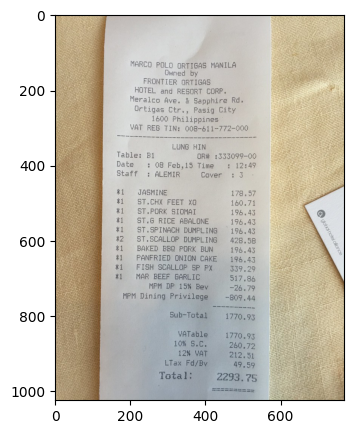

In [5]:
# plotting the bill image
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(bill_image)
plt.show()


In [13]:
import cv2

image = cv2.imread('bill.jpg')

height, width, _ = image.shape

split_height = height // 2  # Dividing the height in half

upper_part = image[:split_height, :]
lower_part = image[split_height:, :]

cv2.imwrite('upper_part.jpg', upper_part)
cv2.imwrite('lower_part.jpg', lower_part)


In [18]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Dulan Lokugeegana\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'


bill_image = Image.open('lower_part.jpg')
text = pytesseract.image_to_string(bill_image)
print(text)

1 ST.PORK SIOMAT
*1 0 ST.6 RICE ABALONE
%10 ST.SPINACH DUMPLING
420 ST.SCALLOP DUMPLING
*%1 BAKED BRQ PORK BUN
41) PANFRIED ONION CAKE
¥1 FISH SCALLOP SP Px
41) MAR BEEF GARLIC
MPM DP 15% Bey
MPM Dining Privilege

Sub-Total

vaTable
10% $.6,

196.43
196.43
196.43
428.58
196.43
196.43
339.29
517.86
726.79
~BOP. 44

1770.93

1770.93
260.72
212.51

49,59

2293.75

Seas




In [30]:
last_numeric_value = None

# Iterate through the list
for item in text.split(" ")[len(text.split(" "))-2: len(text.split(" "))]:
    # Attempt to convert the item to a float (numeric value)
    print(item)
    try:
        numeric_value = float(item)
    except ValueError:
        pass
    if numeric_value > 0:
            last_numeric_value = numeric_value
print(last_numeric_value)

$.6,

196.43
196.43
196.43
428.58
196.43
196.43
339.29
517.86
726.79
~BOP.
44

1770.93

1770.93
260.72
212.51

49,59

2293.75

Seas


None
